In [1]:
!wget https://he-public-data.s3-ap-southeast-1.amazonaws.com/DataSet.zip

--2019-11-20 13:58:33--  https://he-public-data.s3-ap-southeast-1.amazonaws.com/DataSet.zip
Resolving he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)... 52.219.128.115
Connecting to he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)|52.219.128.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 733209860 (699M) [application/zip]
Saving to: ‘DataSet.zip’

DataSet.zip         100%[===================>] 699.24M  19.7MB/s    in 38s     

2019-11-20 13:59:11 (18.5 MB/s) - ‘DataSet.zip’ saved [733209860/733209860]



In [0]:
%%capture
!unzip DataSet.zip
%cd DataSet
!unzip Test\ Images.zip
!unzip Train\ Images.zip
%cd ..

In [4]:
import os
import skimage.io as io
import skimage.transform as ts
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
from tensorflow.keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam

#from IPython.display import Image

Using TensorFlow backend.


In [0]:
train_info = pd.read_csv("DataSet/train.csv")
test_info = pd.read_csv("DataSet/test.csv")

In [0]:
# train_info.head()
# test_info.head()

In [0]:
train_label = np.array([])
for i in range(train_info.shape[0]):
  if (train_info['Class'][i] == 'Large'):
    train_label = np.append(train_label,1)
  else:
    train_label = np.append(train_label,0)
train_label = train_label.astype(np.int64)

In [7]:
print(train_label[0:5])

[1 0 0 0 1]


In [8]:
train_file = train_info['Image_File'].values.tolist()
print(train_file)
test_file = test_info['Image_File'].values.tolist()
print(test_file)

['clean2416.png', 'ground4022.png', 'ground0340.png', 'ground2110.png', 'clean1581.png', 'clean0555.png', 'ground0945.png', 'ground0960.png', 'ground1373.png', 'ground2361.png', 'clean3890.png', 'clean0407.png', 'clean1607.png', 'ground2390.png', 'clean1326.png', 'ground0189.png', 'ground1027.png', 'ground5876.png', 'clean5754.png', 'clean2337.png', 'ground1776.png', 'ground0443.png', 'clean2426.png', 'ground3168.png', 'clean5925.png', 'ground3854.png', 'ground0802.png', 'clean0921.png', 'clean2833.png', 'ground3132.png', 'clean0171.png', 'ground4064.png', 'clean2173.png', 'ground4672.png', 'ground2327.png', 'clean5679.png', 'ground4146.png', 'clean1788.png', 'clean5547.png', 'clean0112.png', 'clean3761.png', 'ground5765.png', 'clean2038.png', 'ground4065.png', 'ground0808.png', 'ground1431.png', 'ground1574.png', 'ground4792.png', 'clean5336.png', 'ground2031.png', 'clean2616.png', 'ground0057.png', 'ground4802.png', 'ground1625.png', 'clean4116.png', 'ground2488.png', 'clean2823.png'

In [9]:
##train_images
images = []
counter = 0
for filename in train_file:
  image = None
  if train_info['Class'][counter] == 'Large':
    image = io.imread('DataSet/Train Images/Large/'+filename)
  else:
    image = io.imread('DataSet/Train Images/Small/'+filename)
  image_resized = ts.resize(image, (64,64,3))
  images.append(image_resized)
  counter+=1
train_images = np.array(images)
print(train_images.shape)
#test_images
images = []
counter = 0
for filename in test_file:
  image = io.imread('DataSet/Test Images/'+filename)
  image_resized = ts.resize(image, (64,64,3))
  images.append(image_resized)
  counter+=1
test_images = np.array(images)
print(test_images.shape)

(11998, 64, 64, 3)
(7534, 64, 64, 3)


In [0]:
#print(train_images[1])

In [10]:
img_shape = (64, 64, 3)
model = Sequential()
model.add(Conv2D(32, 5, input_shape=(img_shape)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=5, padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size=5 , padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=3 , padding='valid'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
model.summary()
ot = Adam(lr=0.001)
Es = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_images, train_label, batch_size=32, epochs=30,shuffle=True,validation_split=0.1,callbacks=[Es])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 64)        0         
_________________________________________

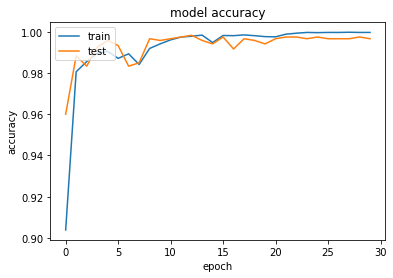

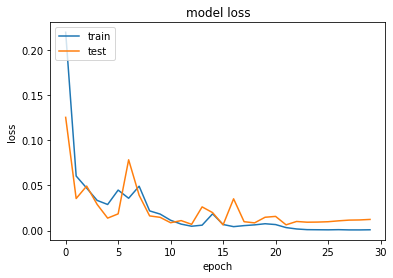

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
!touch submit.csv
file = open('submit.csv','w')
file.write('Image_File,Class\n')
preds = model.predict(test_images)

In [0]:
for i in range(len(preds)):
  if preds[i] > 0.5:
    file.write(test_file[i]+','+'Large\n')
  else:
    file.write(test_file[i]+','+'Small\n')
file.close()

In [0]:
#!diff submit.csv submit2.csv